Step 1: coonnect to google drive for reading resized images

In [1]:
from google.colab import drive
drive.mount('/content/drive', True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Step 2: define path variables

In [0]:
trainign_folder = '/content/drive/My Drive/resized-images/training'
test_folder = '/content/drive/My Drive/resized-images/test'

Step 3: define Image data generator for normalization and reading batch images for training and validation(test) set.

In [0]:
# define all network parameters
image_size = (32, 32) # size of resized image
num_mini_batch = 32 # how many images each time should be read 
num_epochs = 5 # number of times that model should be train
number_of_train = 4770 # number of training sample.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# define image data generator for training set
train_image_generator_object = ImageDataGenerator(
    rescale= 1./255
)

train_generator = train_image_generator_object.flow_from_directory(
    trainign_folder,
    batch_size=num_mini_batch,
    target_size=image_size
)

# image data generator for test set
test_image_generator_object = ImageDataGenerator(
    rescale= 1./255
)

test_generator = test_image_generator_object.flow_from_directory(
    test_folder,
    batch_size=num_mini_batch,
    target_size=image_size
)

Using TensorFlow backend.


Found 4770 images belonging to 10 classes.
Found 1595 images belonging to 10 classes.


Step 4: define  model structure

---
number of layers , filters and so on.


In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

fruit_model = Sequential()
fruit_model.add(Conv2D(input_shape=(32, 32 ,3), kernel_size=3,filters=4))
fruit_model.add(LeakyReLU(0.1))
fruit_model.add(MaxPooling2D(pool_size=(2,2)))
fruit_model.add(Flatten())
fruit_model.add(Dense(50))
fruit_model.add(LeakyReLU(0.1))
fruit_model.add(Dense(10, activation='softmax'))
fruit_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 4)         112       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 30, 30, 4)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 4)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                45050     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

Step 5: compile model


---
define loss function adn optimizer and metrics to report

In [0]:
fruit_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

Step 6: start training

---
fit train and validation data set and define how many epoches model should be train.


In [57]:
histObject = fruit_model.fit(train_generator,
          steps_per_epoch=(number_of_train // num_mini_batch),
          epochs=num_epochs,
          verbose=1,
          validation_data=test_generator)

Epoch 1/5
149/149 [==============================] - 7s 47ms/step - loss: 0.6707 - accuracy: 0.8092 - val_loss: 0.3189 - val_accuracy: 0.9373
Epoch 2/5
149/149 [==============================] - 7s 47ms/step - loss: 0.0646 - accuracy: 0.9880 - val_loss: 0.1818 - val_accuracy: 0.9655
Epoch 3/5
149/149 [==============================] - 7s 46ms/step - loss: 0.0203 - accuracy: 0.9981 - val_loss: 0.0705 - val_accuracy: 0.9793
Epoch 4/5
149/149 [==============================] - 7s 46ms/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 0.0559 - val_accuracy: 0.9774
Epoch 5/5
149/149 [==============================] - 7s 46ms/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 0.0347 - val_accuracy: 0.9530


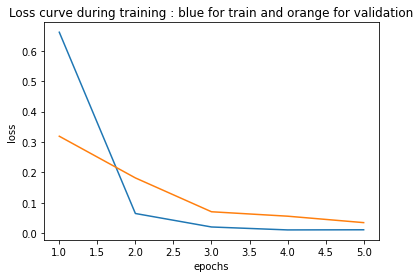

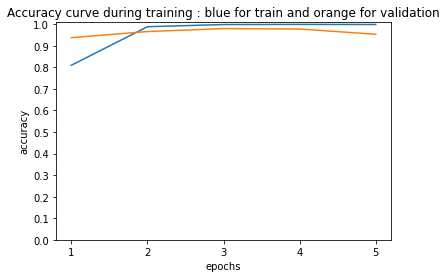

In [58]:
import matplotlib.pyplot as plt
import numpy as np
# plot loss functions curve function as epochs
plt.figure(1)
plt.plot(np.arange(1, num_epochs+1), histObject.history['loss'])
plt.plot(np.arange(1, num_epochs+1), histObject.history['val_loss'])
plt.title('Loss curve during training : blue for train and orange for validation')
plt.xlabel('epochs')
plt.ylabel('loss')
# plot accuracy curve function as epochs

plt.figure(2)
plt.plot(np.arange(1, num_epochs+1), histObject.history['accuracy'])
plt.plot(np.arange(1, num_epochs+1), histObject.history['val_accuracy'])
plt.xticks(np.arange(1, num_epochs+1))
plt.yticks(np.arange(0,1.1, .1))
plt.title('Accuracy curve during training : blue for train and orange for validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [0]:
from keras.preprocessing.image import load_img, img_to_array
import os
# evaluate model.
y_true = []
y_pred = []
# calculate precision recall and f score for each class.
class_indics = test_generator.class_indices
for folder in class_indics.keys():
    for r,f, images in os.walk(test_folder+'/'+folder):
        for image_address in images:
            img = load_img(test_folder+'/'+folder+'/'+image_address)
            img = img_to_array(img) / 255 # normalize image.
            y_true.append(class_indics[folder])
            y_pred.append(
                 np.argmax(
                     fruit_model.predict(np.array([img]))
                )
            )

In [60]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true, 
        y_pred, 
        target_names=class_indics.keys()
    )
)

                precision    recall  f1-score   support

Apple Braeburn       1.00      0.69      0.82       164
        Banana       1.00      1.00      1.00       166
      Cherry 1       1.00      1.00      1.00       164
    Grape Pink       0.75      1.00      0.86       164
         Peach       1.00      1.00      1.00       164
          Pear       0.98      1.00      0.99       164
  Pepper Green       0.89      1.00      0.94       148
          Plum       1.00      0.98      0.99       151
  Potato Sweet       1.00      0.86      0.92       150
      Tomato 4       1.00      1.00      1.00       160

      accuracy                           0.95      1595
     macro avg       0.96      0.95      0.95      1595
  weighted avg       0.96      0.95      0.95      1595



In [61]:
# calculate confusion matrix
c_m = np.zeros((10, 10))
for _ in range(len(y_true)):
    i = y_pred[_]
    j = y_true[_]
    c_m[i,j] += 1

print('confusion matrix')
print(c_m)

confusion matrix
[[113.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 166.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 164.   0.   0.   0.   0.   0.   0.   0.]
 [ 51.   0.   0. 164.   0.   0.   0.   3.   0.   0.]
 [  0.   0.   0.   0. 164.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 164.   0.   0.   3.   0.]
 [  0.   0.   0.   0.   0.   0. 148.   0.  18.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 148.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 129.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 160.]]


In [62]:

# calculate precision and recall for each class
for key in class_indics.keys():
    class_index = class_indics[key]
    tp = c_m[class_index, class_index]
    fp = c_m[class_index, :].sum() - tp
    fn = c_m[:, class_index].sum() - tp
    if fp == 0 and tp == 0:
        precision = 0
    else:
        precision = tp / (tp+fp)
 
    if fn == 0 and tp == 0:
        recall = 0
    else:
        recall = tp / (tp+fn)

    if recall == 0 and precision == 0:
        f1_score = 0
    else:
        f1_score = 2* precision * recall / (precision + recall)
    print('class ', key,'     precision', precision, '  recall', recall, '   f1_score', f1_score)

class  Apple Braeburn      precision 1.0   recall 0.6890243902439024    f1_score 0.815884476534296
class  Banana      precision 1.0   recall 1.0    f1_score 1.0
class  Cherry 1      precision 1.0   recall 1.0    f1_score 1.0
class  Grape Pink      precision 0.7522935779816514   recall 1.0    f1_score 0.8586387434554975
class  Peach      precision 1.0   recall 1.0    f1_score 1.0
class  Pear      precision 0.9820359281437125   recall 1.0    f1_score 0.9909365558912386
class  Pepper Green      precision 0.891566265060241   recall 1.0    f1_score 0.9426751592356688
class  Plum      precision 1.0   recall 0.9801324503311258    f1_score 0.9899665551839464
class  Potato Sweet      precision 1.0   recall 0.86    f1_score 0.924731182795699
class  Tomato 4      precision 1.0   recall 1.0    f1_score 1.0
